In [1]:
from plx_gpib_ethernet import PrologixGPIBEthernet
import time
from datetime import *
import time as tlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir()

['.ipynb_checkpoints', 'FrequencyCounterRecording.ipynb', 'setup.exe']

In [3]:
gpib = PrologixGPIBEthernet('192.168.1.106')
gpib.connect()
gpib.select(3)

### Setting channels

In [4]:
gpib.query(':SENSe:FUNCtion:ON ":XNONe:FREQuency 3"')

timeout: timed out

### Test reading

In [5]:
gpib.query(':read?')

'+6.300000002E+009\n'

# Streaming tests

In [6]:
import time

In [7]:
from bokeh.models.sources import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook

In [8]:
output_notebook()

Loading BokehJS ...

In [ ]:
data=[]

my_figure = figure(x_axis_type="datetime",plot_width=600, plot_height=300)
test_data = ColumnDataSource(data=dict(x=[datetime.now()], y=[0]))
line = my_figure.scatter("x", "y", source=test_data)
handle = show(my_figure, notebook_handle=True)
new_data=dict(x=[0], y=[0])
x = []
y = []
step = 0
step_size = 0.1  # increment for increasing step
max_step = 10  # arbitrary stop point for example

period = .5  # in seconds (simulate waiting for new data)
n_show = 100  # number of points to keep and show
while True:
    xtemp = datetime.now()
    ytemp = float(gpib.query(':read?')[:-1])-6300000000
    data.append([xtemp, ytemp])
    df = pd.DataFrame(np.array(data), columns=["Time", "Freq"])
    x.append(xtemp)
    y.append(ytemp)
    new_data['x'] = x = x[-n_show:]  # prevent filling ram
    new_data['y'] = y = y[-n_show:]  # prevent filling ram
    test_data.stream(new_data, n_show)
    push_notebook(handle=handle)
    step += step_size
    time.sleep(period)
    df.to_csv("counterLog18112020.csv")

### Testing data collection

In [19]:
df=df.set_index("Time")
#df.index.values

Text(0, 0.5, 'Frequency')

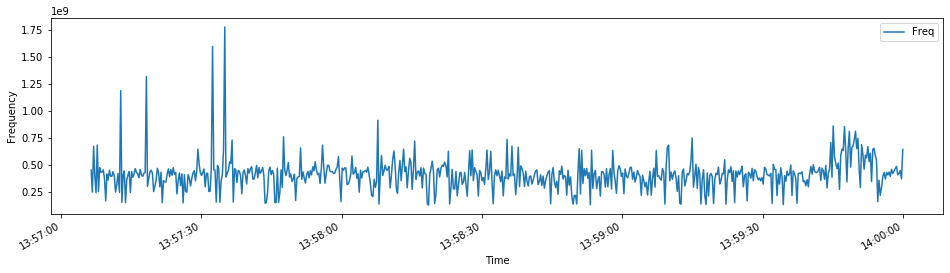

In [20]:
fig, ax = plt.subplots(figsize=(16,4))
df.plot(ax=ax)
ax.set_ylabel("Frequency")
